In [1]:
from astropy.io import fits
from astropy import wcs
import astropy.units as u

import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import glob

In [2]:
folder = 'C:/Users/oryan/Documents/weave-proj/example/data'

In [3]:
files = glob.glob(f'{folder}/*.fits.gz')

In [4]:
files

['C:/Users/oryan/Documents/weave-proj/example/data\\manga-11013-3702-LOGCUBE-arp239-prim-vel.fits.gz',
 'C:/Users/oryan/Documents/weave-proj/example/data\\manga-11013-3702-LOGCUBE-arp239-prim.fits.gz',
 'C:/Users/oryan/Documents/weave-proj/example/data\\manga-11020-6103-LOGCUBE-arp239-sec-vel.fits.gz',
 'C:/Users/oryan/Documents/weave-proj/example/data\\manga-11020-6103-LOGCUBE-arp239-sec.fits.gz']

In [5]:
with fits.open(files[1]) as hdul:
    data = np.transpose(hdul['FLUX'].data, axes=(2,1,0))
    header = hdul['FLUX'].header
    mask = np.transpose(hdul['MASK'].data, axes=(2,1,0))    
    wave = hdul['WAVE'].data
    print(hdul.info())

Filename: C:/Users/oryan/Documents/weave-proj/example/data\manga-11013-3702-LOGCUBE-arp239-prim.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (42, 42, 4563)   float32   
  2  IVAR          1 ImageHDU        17   (42, 42, 4563)   float32   
  3  MASK          1 ImageHDU        17   (42, 42, 4563)   int32   
  4  LSFPOST       1 ImageHDU        11   (42, 42, 4563)   float32   
  5  LSFPRE        1 ImageHDU        11   (42, 42, 4563)   float32   
  6  WAVE          1 ImageHDU         9   (4563,)   float64   
  7  SPECRES       1 ImageHDU         9   (4563,)   float64   
  8  SPECRESD      1 ImageHDU         9   (4563,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (4563,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (4563,)   float64   
 11  OBSINFO       1 BinTableHDU    148   9R x 65C   [26A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 

In [6]:
print(data.shape)

(42, 42, 4563)


In [7]:
print(mask.shape)

(42, 42, 4563)


For a full tutorial on reading the data, go here:

https://www.sdss4.org/dr17/manga/manga-tutorials/how-do-i-look-at-my-data/python/

### Getting the Narrow Band Image from the DataCube

In [8]:
cubeWCS = wcs.WCS(header)

a string value was expected. [astropy.wcs.wcs]


In [9]:
ra = 205.4150215752399
dec = 55.6706753844000

In [10]:
x_cube_coord, y_cube_coord, _ = cubeWCS.wcs_world2pix([[ra,dec,1.0]], 1)[0]

In [11]:
x_spaxel = np.int(np.round(x_cube_coord)) - 1
y_spaxel = np.int(np.round(y_cube_coord)) - 1

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. 

In [12]:
do_not_use = (mask & 2**10) != 0

In [13]:
do_not_use.shape

(42, 42, 4563)

In [14]:
flux_m = np.ma.array(data, mask = do_not_use)

In [15]:
x_center = np.int(header['CRPIX1']) - 1
y_center = np.int(header['CRPIX2']) - 1

redshift = 0.025386
ind_wave = np.where((wave / (1 + redshift) > 6550) & (wave / (1 + redshift) < 6680))[0]
halpha = flux_m[:,:,ind_wave].sum(axis = 2)
im = halpha.T

dx = header['CD1_1'] * 3600
dy = header['CD2_2'] * 3600
x_extent = (np.array([0, im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0, im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. 

In [16]:
np.min(im)

8.011838

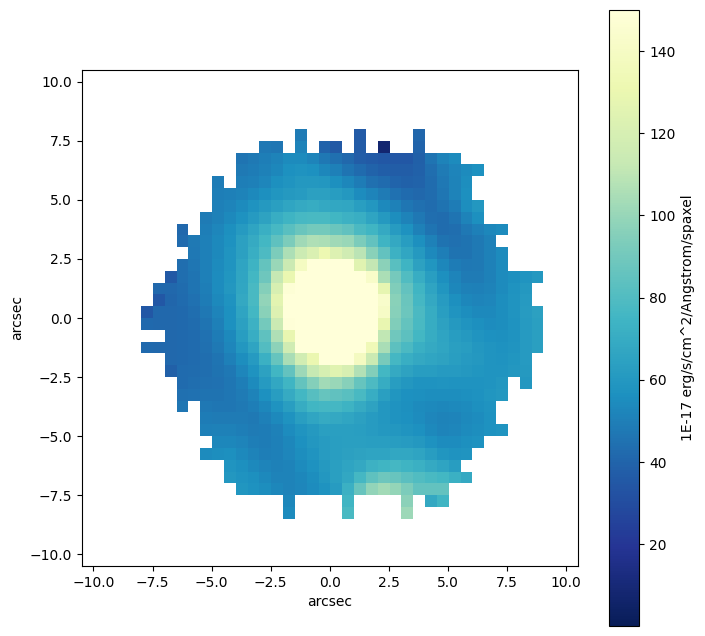

In [17]:
plt.figure(figsize = (8,8))
plt.imshow(im, extent=extent, cmap=cm.YlGnBu_r, vmin=0.1, vmax=150, origin = 'lower', interpolation = 'none')
plt.colorbar(label = header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.show()

### Finding Peaks in Halpha

In [18]:
data.shape

(42, 42, 4563)

In [19]:
spectra = data[21,21,:]

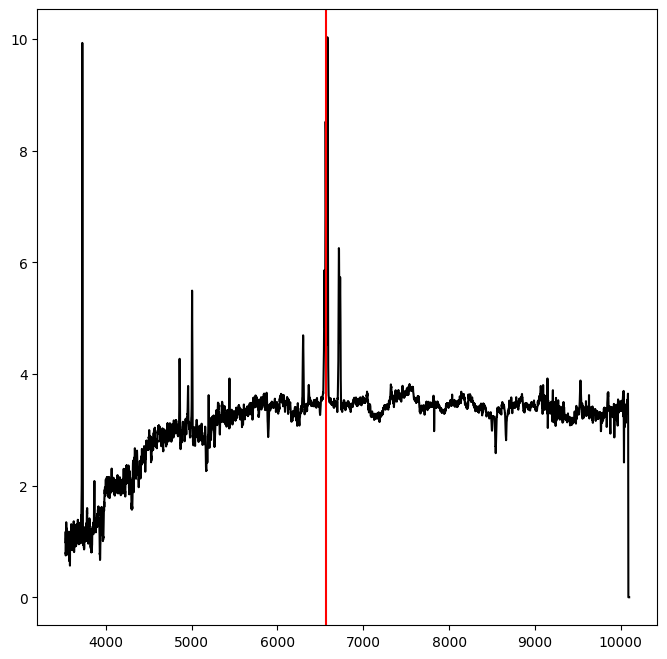

In [20]:
plt.figure(figsize = (8,8))
plt.plot(wave / (1 + redshift), spectra, color='black')
plt.axvline(6564.6, color='r')
plt.show()

In [21]:
wave_rest = wave / (1 + redshift)

In [22]:
wave_red = wave_rest[(wave_rest > 6564.6 - 15) & (wave_rest < 6564.6 + 15)]
spectra_red = spectra[(wave_rest > 6564.6 - 15) & (wave_rest < 6564.6 + 15)]

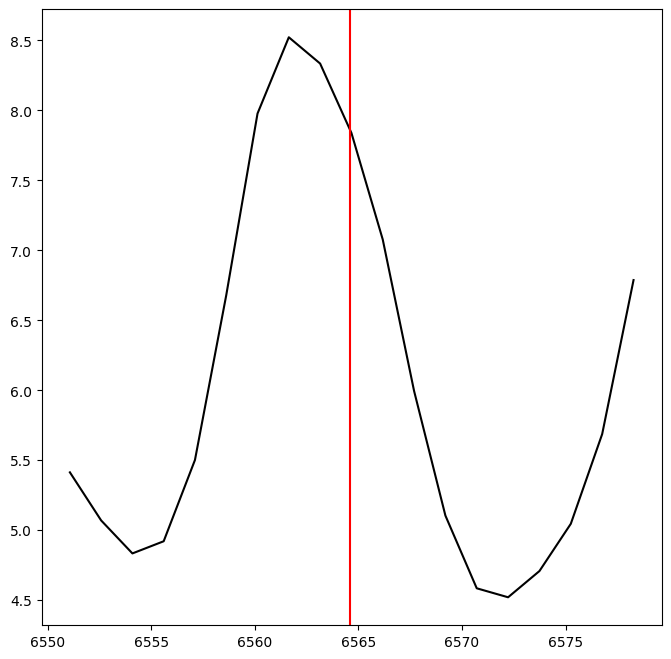

In [23]:
plt.figure(figsize = (8,8))
plt.plot(wave_red, spectra_red, color='black')
plt.axvline(6564.6, color='r')
plt.show()

In [24]:
ind = np.where(spectra_red == np.max(spectra_red))[0][0]

In [25]:
halpha_rest = 6564.6 * u.angstrom
c = 3e8 * u.m / u.s

In [26]:
wave_max = wave_red[ind] * u.angstrom

In [27]:
v = (c * ((wave_max - halpha_rest) / halpha_rest)).to(u.km / u.s)

In [28]:
v

<Quantity -135.12115271 km / s>

### Doing for all Spaxels

In [29]:
do_not_use[0,0,0]

True

In [30]:
wave_rest = wave / (1 + redshift)
halpha_rest = 6564.6 * u.angstrom
c = 3e8 * u.m / u.s

vel_data = np.nan * np.zeros([data.shape[0], data.shape[1]])

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        
        if do_not_use[i,j,0]:
            continue
        
        spectra = np.ma.array(data[i,j,:], mask = do_not_use[i,j,:])
        
        if spectra.max() == 0:
            continue
        
        spectra_red = spectra[(wave_rest > 6564.6 - 15) & (wave_rest < 6564.6 + 15)]
        
        ind = np.where(spectra_red == np.max(spectra_red))[0][0]
        
        wave_max = wave_red[ind] * u.angstrom
        
        v = (c * ((wave_max - halpha_rest) / halpha_rest)).to(u.km / u.s)
        
        assert v.unit == u.km / u.s
        
        v_int = np.float(v * u.s / u.km)
        
        vel_data[i,j] = v_int

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [31]:
vel_data[vel_data < -500] = np.nan
vel_data[vel_data > 500] = np.nan

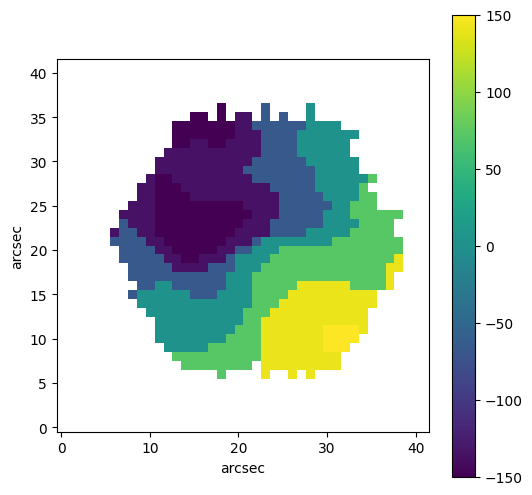

In [38]:
plt.figure(figsize = (6,6))
plt.imshow(np.transpose(vel_data), origin = 'lower', vmin = -150, vmax = 150)
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.show()

### Saving

In [116]:
fits_file = fits.open(files[0])

In [117]:
header_exp = header.copy()

In [118]:
header_exp['EXTNAME'] = 'VEL'

In [119]:
image_hdu = fits.ImageHDU(vel_data, header=header_exp)

In [120]:
fits_file.append(image_hdu)

In [121]:
fits_file.writeto(f'{os.path.dirname(files[2])}/{os.path.basename(files[2]).replace("-sec", "-sec-vel")}')